In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LogNorm

#number of data points
n = 10000
# the random data
x = np.random.randn(n)
y = np.random.randn(n)

In [9]:
nullfmt   = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

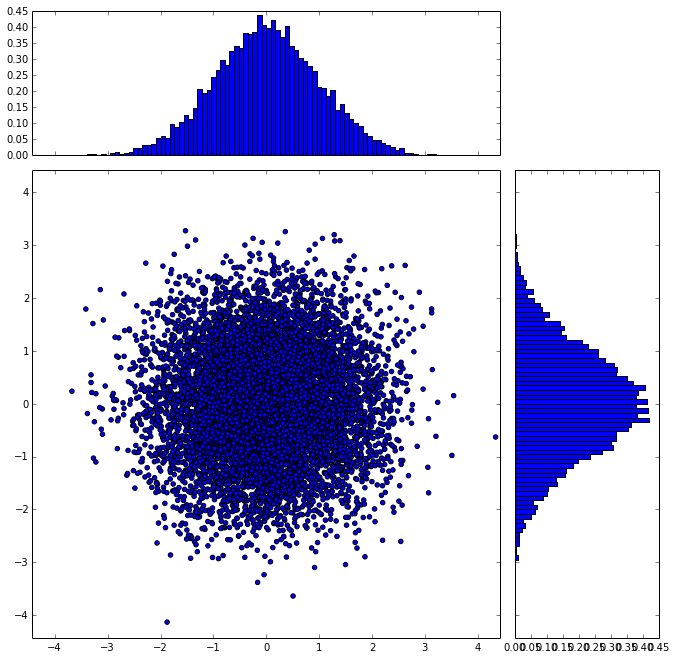

In [10]:
# start with a rectangular Figure
plt.figure(1, figsize=(10,10))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
#binwidth = 0.25
bins=int(sqrt(n))
xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
binwidth = 2*xymax/bins
lim = ( int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim( (-lim, lim) )
axScatter.set_ylim( (-lim, lim) )

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins, normed=True)
Histx_tl=[]
for tl in axHistx.get_yticklabels():
    Histx_tl.append(tl)
axHisty.hist(y, bins=bins, normed=True, orientation='horizontal')
#axHisty.set_xticklabels(axHistx.get_yticklabels())

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

plt.show()

NameError: name 'make_axes_locatable' is not defined

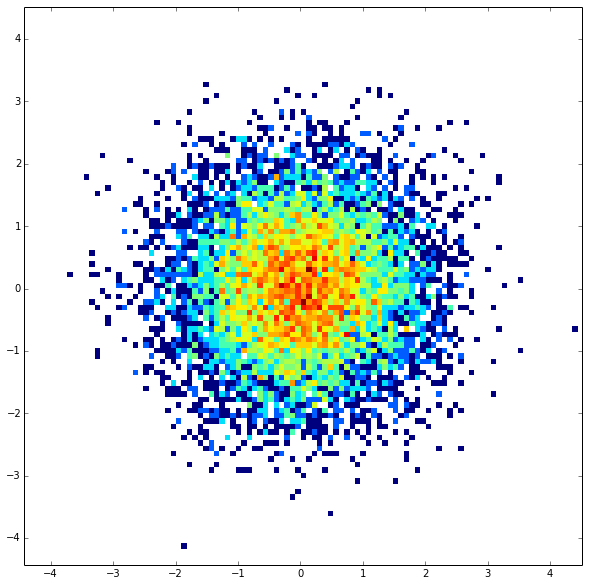

In [11]:
fig, axScatter = plt.subplots(figsize=(10,10))

# the scatter plot:
axScatter.hist2d(x, y, bins, norm=LogNorm())
axScatter.set_aspect(1.)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

# make some labels invisible
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)

#bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 50, 100])

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 50, 100])

plt.draw()
plt.show()